In [10]:
import sys
import logging
import pickle
import yaml
import matplotlib.cm as cm
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import time
import seaborn as sns
from configs import engram_dir

### Helper functions

In [11]:
def manhattan_dist(xy, xy2):
    x, y = xy
    x2, y2 = xy2
    return abs(x-x2) + abs(y-y2)

### Parameters

In [12]:
internal_dim = 10
generic_exp_name = 'iqn'
network_yaml = 'iqn'
episode = 350
hue_order = ['mf0', 'mf-1']

In [13]:
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

### Load and Plot

In [14]:
with open(f'{analysis_dir}quantile_df_ep{episode}.p', 'rb') as f:
    df = pickle.load(f)

In [15]:
df

,model,iteration,x,y,distance from goal,quadrant,goal state,quantile,action,quantile val
0,iqn_mf-1,25,1,1,7,0,"[7, 2]",0.0,0,0.925768
1,iqn_mf-1,25,1,2,6,0,"[7, 2]",0.0,0,0.924962
2,iqn_mf-1,25,1,3,7,0,"[7, 2]",0.0,0,0.899879
3,iqn_mf-1,25,1,4,8,0,"[7, 2]",0.0,0,0.843180
4,iqn_mf-1,25,1,5,9,1,"[7, 2]",0.0,0,0.772272
...,...,...,...,...,...,...,...,...,...,...
129019,iqn_mf-1,24,8,4,10,2,"[1, 1]",1.0,3,0.988211
129020,iqn_mf-1,24,8,5,11,3,"[1, 1]",1.0,3,0.901483
129021,iqn_mf-1,24,8,6,12,3,"[1, 1]",1.0,3,0.822978
129022,iqn_mf-1,24,8,7,13,3,"[1, 1]",1.0,3,0.767488


# Quantile values far from goal

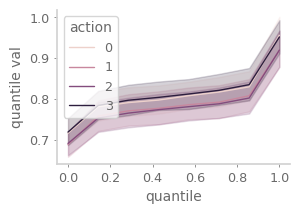

In [20]:
_df = df[df['distance from goal'] > 10]
plt.figure(figsize=(3,2))
sns.lineplot(x='quantile', y = 'quantile val', hue='action', data=_df)
plt.show()

# Quantile values close to goal

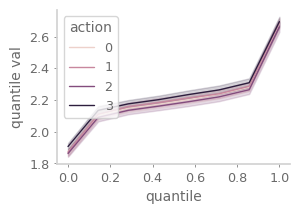

In [21]:
_df = df[df['distance from goal'] < 3]
plt.figure(figsize=(3,2))
sns.lineplot(x='quantile', y = 'quantile val', hue='action', data=_df)
plt.show()

# Specific examples

In [44]:
_df = df.copy()
_df = _df[_df['iteration']== 1]
_df = _df[_df['model'] == 'iqn_mf0']
print(np.unique(_df['goal state'])) # There should only be one
goal_state = np.unique(_df['goal state'])[0]
goal_x, goal_y = goal_state

[list([1, 7])]


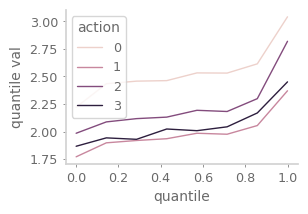

In [46]:
# Actions: 0 is [-1, 0], 1 is [0, -1], 2 is [1, 0], and 3 is [0, 1]
_df_close = _df[(_df['x']==goal_x+1) & (_df['y']==goal_y)]
plt.figure(figsize=(3,2))
sns.lineplot(x='quantile', y = 'quantile val', hue='action', data=_df_close)
plt.show()

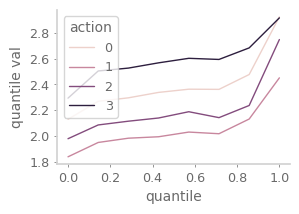

In [47]:
# Actions: 0 is [-1, 0], 1 is [0, -1], 2 is [1, 0], and 3 is [0, 1]
_df_close = _df[(_df['x']==goal_x) & (_df['y']==goal_y-1)]
plt.figure(figsize=(3,2))
sns.lineplot(x='quantile', y = 'quantile val', hue='action', data=_df_close)
plt.show()

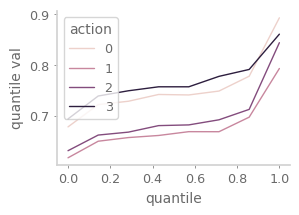

In [48]:
# Actions: 0 is [-1, 0], 1 is [0, -1], 2 is [1, 0], and 3 is [0, 1]
_df_far = _df[(_df['x']==7) & (_df['y']==1)]
plt.figure(figsize=(3,2))
sns.lineplot(x='quantile', y = 'quantile val', hue='action', data=_df_far)
plt.show()